# Exercise 4b - Image Morphology

In [1]:
import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt

In [2]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

In [3]:
in_dir = 'data/'

## Image morphology on a single object

Morphological operations are applied to the region with "True" (for boolean images). In other words, morphological operations are applied to the white areas in the binary image.

### Exercise 1

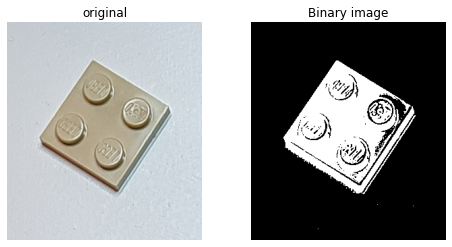

In [4]:
in_file = 'lego_5.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres # The ROI is usually with 
plot_comparison(im_org, bin_img, 'Binary image')

### Exercise 2


In [5]:
footprint = disk(2)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


In [6]:
def apply_erosion(binary, disk_sz):
    footprint = disk(disk_sz)
    eroded = erosion(binary, footprint)
    return eroded

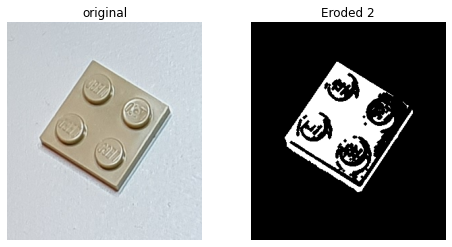

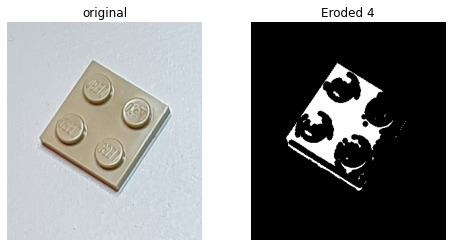

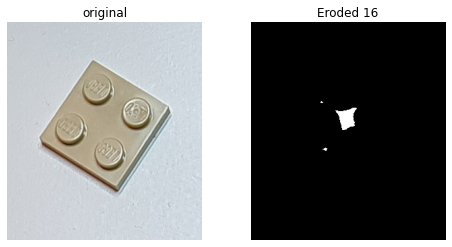

In [7]:
for sz in [2, 4, 16]:
    eroded = apply_erosion(bin_img, sz)
    plot_comparison(im_org, eroded, f'Eroded {sz}')

### Exercise 3

In [8]:
def apply_dilation(binary, disk_sz):
    footprint = disk(disk_sz)
    dilated = dilation(binary, footprint)
    return dilated

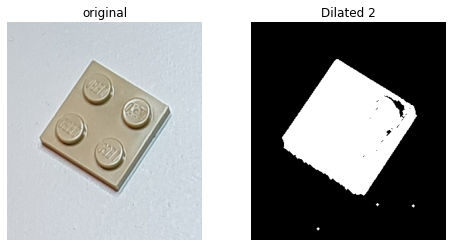

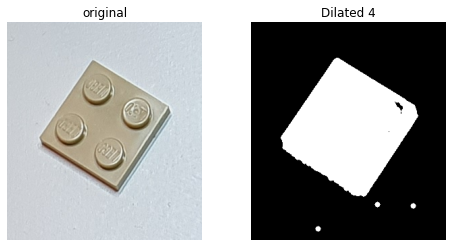

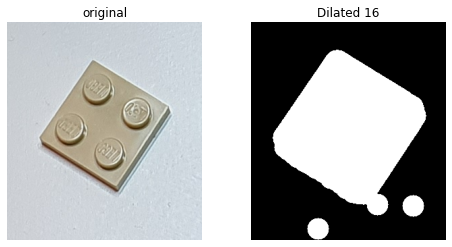

In [9]:
for sz in [2, 4, 16]:
    dilated = apply_dilation(bin_img, sz)
    plot_comparison(im_org, dilated, f'Dilated {sz}')

### Exercise 4


In [10]:
def apply_opening(binary, disk_sz):
    footprint = disk(disk_sz)
    opened = opening(binary, footprint)
    return opened

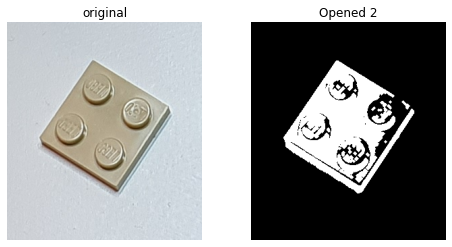

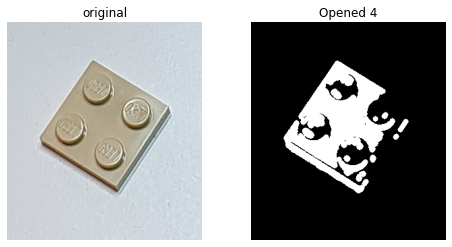

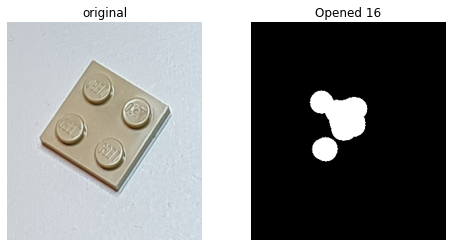

In [11]:
for sz in [2, 4, 16]:
    opened = apply_opening(bin_img, sz)
    plot_comparison(im_org, opened, f'Opened {sz}')

### Exercise 5

In [12]:
def apply_closing(binary, disk_sz):
    footprint = disk(disk_sz)
    closed = closing(binary, footprint)
    return closed

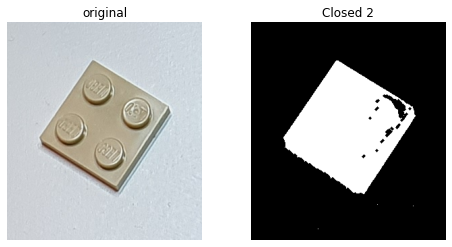

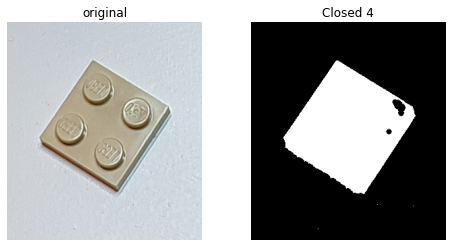

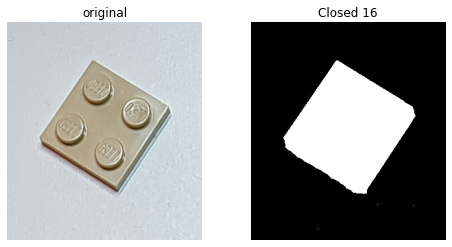

In [13]:
for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    plot_comparison(im_org, closed, f'Closed {sz}')

## Object outline

In [14]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

### Exercise 6


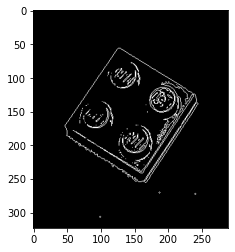

In [15]:
outline_img = compute_outline(bin_img)
plt.imshow(outline_img, cmap = 'gray') # Some people had problems with io.imshow() in boolean images
plt.show()

### Exercise 7


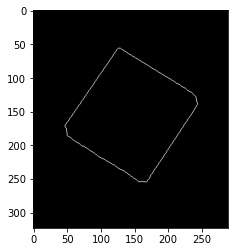

In [16]:
step1 = apply_opening(bin_img, 1)
step2 = apply_closing(step1, 15)
outline_img = compute_outline(step2)
plt.imshow(outline_img, cmap = 'gray')
plt.show()

## Morphology on multiple objects


### Exercise 8


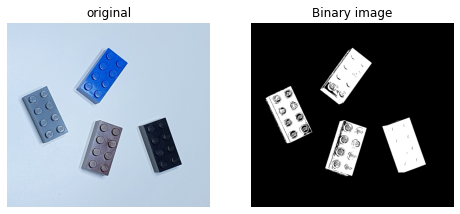

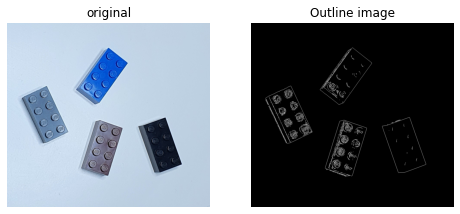

In [17]:
in_file = 'lego_7.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

outline_img = compute_outline(bin_img)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 9

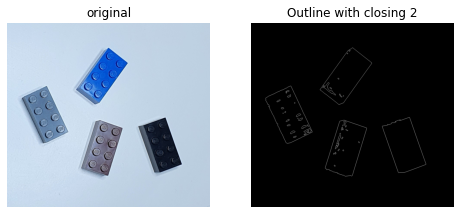

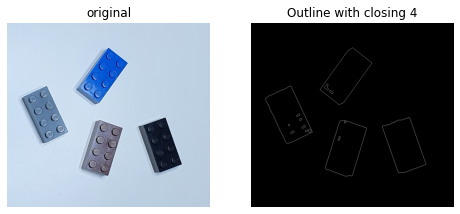

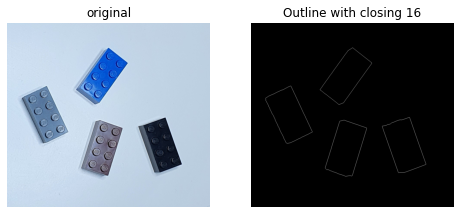

In [18]:
for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    outline_img = compute_outline(closed)
    plot_comparison(im_org, outline_img, f'Outline with closing {sz}')

### Exercise 10


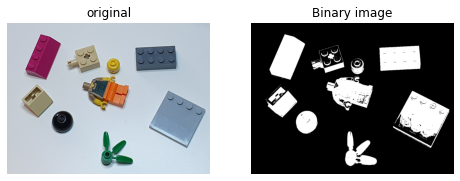

In [19]:
in_file = 'lego_3.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

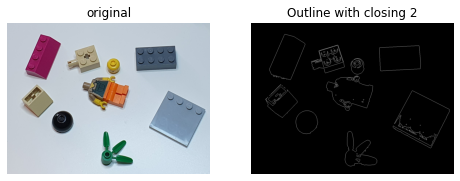

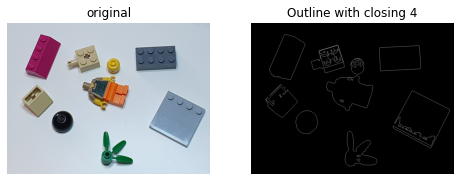

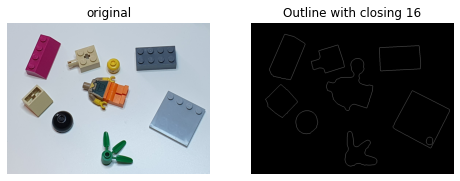

In [20]:
for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    outline_img = compute_outline(closed)
    plot_comparison(im_org, outline_img, f'Outline with closing {sz}')

## Morphology on multiple connected objects


### Exercise 11

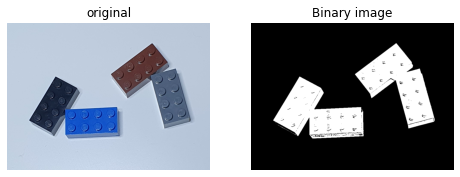

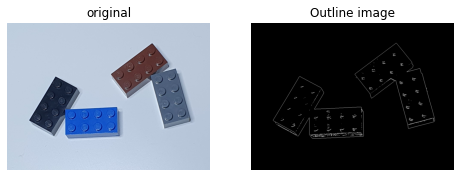

In [21]:
in_file = 'lego_9.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

outline_img = compute_outline(bin_img)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 12

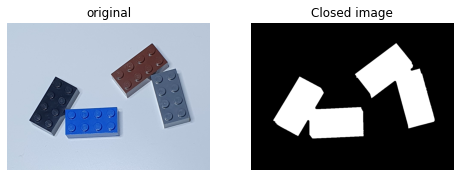

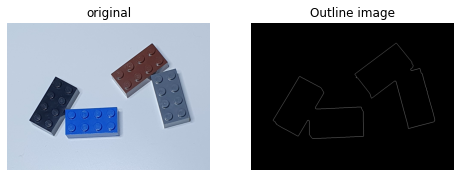

In [22]:
closed = apply_closing(bin_img, 5)
plot_comparison(im_org, closed, 'Closed image')
outline_img = compute_outline(closed)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 13

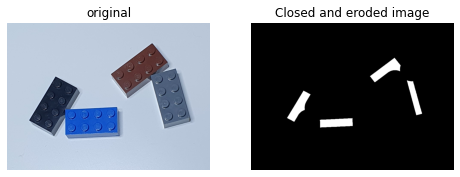

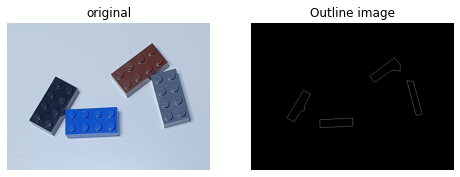

In [23]:
closed = apply_closing(bin_img, 5)
eroded = apply_erosion(closed, 50)
plot_comparison(im_org, eroded, 'Closed and eroded image')
outline_img = compute_outline(eroded)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 14

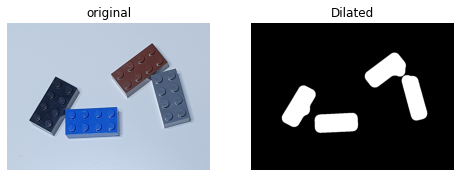

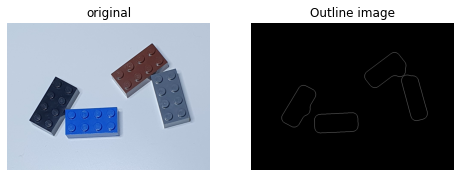

In [24]:
dilated = apply_dilation(eroded, 25)
plot_comparison(im_org, dilated, 'Dilated')
outline_img = compute_outline(dilated)
plot_comparison(im_org, outline_img, 'Outline image')

## Puzzle piece analysis

### Exercise 15

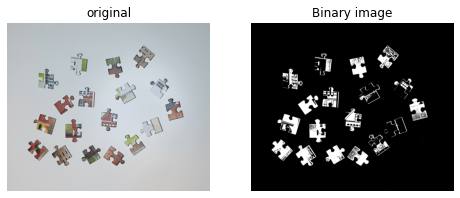

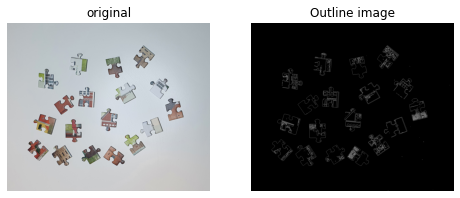

In [25]:
in_file = 'puzzle_pieces.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

outline_img = compute_outline(bin_img)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 16

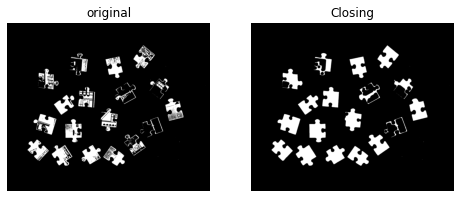

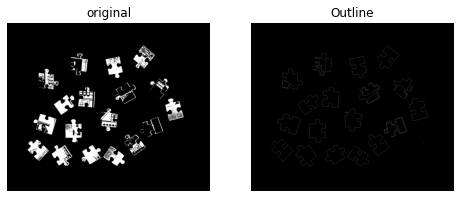

In [26]:
closed = apply_closing(bin_img, 15)
plot_comparison(bin_img, closed, 'Closing')

outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'Outline')